In [2]:
from qutip import *
import cmath
import math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Qubit number

Num=3

In [4]:
init=[]

for n in range(Num):
    init.append(basis(2,0))
    
init=tensor(init)

In [5]:
Qeye=[]

for n in range(Num):
    Qeye.append(qeye(2))
    
Qeye=tensor(Qeye)

def Xop(m): 
    
    X=[]
    for n in range(Num):
        
        if n==m:
            X.append(sigmax())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

# %%
def Yop(m): 
    
    X=[]
    for n in range(Num):
        
        if n==m:
            X.append(sigmay())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

# %%
def Zop(m): 
    
    X=[]
    for n in range(Num):
        
        if n==m:
            X.append(sigmaz())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

# %%
def Xop2(m): 
    
    X=[]
    for n in range(Num+1):
        
        if n==m:
            X.append(sigmax())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

# %%
def Yop2(m): 
    
    X=[]
    for n in range(Num+1):
        
        if n==m:
            X.append(sigmay())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

# %%
def Zop2(m): 
    
    X=[]
    for n in range(Num+1):
        
        if n==m:
            X.append(sigmaz())
        else: 
            X.append(qeye(2))
    X=tensor(X)
    
    return X

In [6]:
Hamset=[]

V=1.0 

hx=1.0 

hz=0

for n in range(Num-1):
    
    Hamset.append( V/4* Zop(n)*Zop(n+1) )
    
for n in range(Num):
    
    Hamset.append(hx*Xop(n))
    
    Hamset.append(hz*Zop(n))
    
Hamil= 0* Zop(0)

for n in range(len(Hamset)):
    Hamil=Hamil+Hamset[n]

Hamil=Hamil

eigvals, eigvecs= Hamil.eigenstates()

In [9]:
print(Hamil)

Quantum object: dims=[[2, 2, 2], [2, 2, 2]], shape=(8, 8), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 0.5  1.   1.   0.   1.   0.   0.   0. ]
 [ 1.   0.   0.   1.   0.   1.   0.   0. ]
 [ 1.   0.  -0.5  1.   0.   0.   1.   0. ]
 [ 0.   1.   1.   0.   0.   0.   0.   1. ]
 [ 1.   0.   0.   0.   0.   1.   1.   0. ]
 [ 0.   1.   0.   0.   1.  -0.5  0.   1. ]
 [ 0.   0.   1.   0.   1.   0.   0.   1. ]
 [ 0.   0.   0.   1.   0.   1.   1.   0.5]]


In [6]:
type(Hamil)

qutip.core.qobj.Qobj

In [7]:
eigvals

array([-3.03124812, -1.36815091, -1.        , -0.66309722,  0.66309722,
        1.        ,  1.36815091,  3.03124812])

In [8]:
ground_state_energy = np.min(eigvals)
print(f"The min eigen value is: {ground_state_energy}")

The min eigen value is: -3.031248122331948


In [9]:
def fil(a,x):
    return np.sqrt(a/np.pi)*np.exp(-a*x**2)

anc=(basis(2,0)+basis(2,1))/np.sqrt(2)

plus=(basis(2,0)+basis(2,1))/np.sqrt(2)

def Depolarise(rho,n,p):
    
    rho=(1.0-p)*rho+(p/3.0)*(Xop(n)*rho*Xop(n)+Yop(n)*rho*Yop(n)+Zop(n)*rho*Zop(n))
    
    return rho

def Depolarise2(rho,n,p):
    
    rho=(1.0-p)*rho+(p/3.0)*(Xop2(n)*rho*Xop2(n)+Yop2(n)*rho*Yop2(n)+Zop2(n)*rho*Zop2(n))
    
    return rho

def Trotter(Ha,tt, N):
    Tro= Qeye 
    
    for n in range(len(Ha)):
        
        Tro= Tro*(-1j*Ha[n]*tt/N).expm()
        
    
    Res= Tro**N
    
    return Res
    
def controlH(Ham,tt): 
    contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), (-1j*Ham*tt).expm())
    
    return contev


def controlHTro(Ha,tt, N): 
    
    Trop= Trotter(Ha, tt, N)
    
    contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), Trop)
    
    return contev

def noisyTrotone(tt, NN, rho, pp1, pp2):
    
    sta=rho
    
    for n in range(Num-1):
        
        contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), (-1j*V/4* Zop(n)*Zop(n+1)*tt/NN).expm())
    
        
        sta=contev* sta* contev.dag()
        
        sta= Depolarise2(sta,0,pp1) 
        
        sta= Depolarise2(sta,n,pp2) 
        
        sta= Depolarise2(sta,n+1,pp2) 
        
    for n in range(Num):
        
        contev=tensor(basis(2,0)*basis(2,0).dag(), Qeye)+tensor(basis(2,1)*basis(2,1).dag(), (-1j*hx* Xop(n)*tt/NN).expm())
        
        sta=contev*sta* contev.dag()
        
    
    return sta

#### Param

In [10]:
# main code 

delt = 0.5

Nran=20


Ntro=20

# Ancilla 
perr1=0.1

# System
perr2=0.001

Nshots=10*5

In [11]:
quint=init

quint2=tensor(ket2dm(anc), ket2dm(quint))

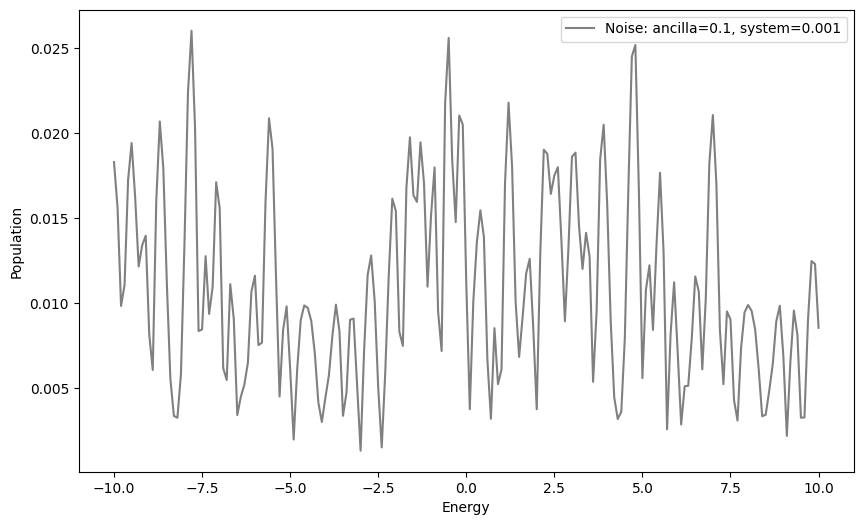

In [12]:
import random

# Add shot noise, with physical noise
delt = 0.5
Nran = 20
Ntro = 20

# Ancilla
perr1 = 0.1

# System
perr2 = 0.001

Nshots = 10 * 5
quint = init
quint2 = tensor(ket2dm(anc), ket2dm(quint))

EX, EY, Time = [], [], []

for n1 in range(-Nran, Nran + 1):
    t1 = delt * n1
    Time.append(t1)

    # noisyTrotone(tt, NN, rho, pp)
    state = quint2
    for kk in range(Ntro):
        state = noisyTrotone(t1, Ntro, state, perr1, perr2)

    expecx = (tensor(sigmax(), Qeye) * state).tr()
    expecy = (tensor(sigmay(), Qeye) * state).tr()
    varx = 1 - expecx ** 2
    vary = 1 - expecy ** 2

    randx = random.gauss(mu=expecx, sigma=np.sqrt(varx / Nshots))
    randy = random.gauss(mu=expecy, sigma=np.sqrt(vary / Nshots))

    EX.append(randx)
    EY.append(randy)

# Sweep energy
gamm = 0.001
delE = 0.1
Range = 100
Val, Energy = [], []

for k in range(-Range, Range + 1):
    Ee = delE * k
    Energy.append(Ee)

    val = 0
    for n in range(0, 2 * Nran + 1):
        t1 = delt * (n - Nran)
        val += fil(gamm, t1) * np.exp(1j * Ee * t1) * (EX[n] + 1j * EY[n]) * delt

    Val.append(abs(val))

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Reference point coordinates
ref_energy = eigvals[0]  # Example x-coordinate for the reference point
ref_val = np.sin(ref_energy)  # Example y-coordinate for the reference point

axes.plot(Energy, Val, "-", color="Gray", label=f'Noise: ancilla={perr1}, system={perr2}')
axes.legend(loc='best')

# Axis labels
axes.set_xlabel('Energy')
axes.set_ylabel('Population')

# Show plot
plt.show()

### Coling function

In [13]:
def Cooling(
        gamm: float,
        delt: float,
        Nran: int,
        Ntro: int,
        noise_anc: float,
        noise_sys: float,
        shots: int,
):
    quint = init
    quint2 = tensor(ket2dm(anc), ket2dm(quint))

    EX, EY, Time = [], [], []

    for n1 in range(-Nran, Nran + 1):
        t1 = delt * n1
        Time.append(t1)

        # noisyTrotone(tt, NN, rho, pp)
        state = quint2
        for kk in range(Ntro):
            state = noisyTrotone(t1, Ntro, state, noise_anc, noise_sys)

        expecx = (tensor(sigmax(), Qeye) * state).tr()
        expecy = (tensor(sigmay(), Qeye) * state).tr()
        varx = 1 - expecx ** 2
        vary = 1 - expecy ** 2

        randx = random.gauss(mu=expecx, sigma=np.sqrt(varx / shots))
        randy = random.gauss(mu=expecy, sigma=np.sqrt(vary / shots))

        EX.append(randx)
        EY.append(randy)

    # Sweep energy
    #gamm = 0.001
    delE = 0.1
    Range = 100
    Val, Energy = [], []

    for k in range(-Range, Range + 1):
        Ee = delE * k
        Energy.append(Ee)

        val = 0
        for n in range(0, 2 * Nran + 1):
            t1 = delt * (n - Nran)
            val += fil(gamm, t1) * np.exp(1j * Ee * t1) * (EX[n] + 1j * EY[n]) * delt

        Val.append(abs(val))

    return [Energy, Val]


### Exact min eigen value (ground state)

In [14]:
print(f"GS Energy: {ground_state_energy}")

GS Energy: -3.031248122331948


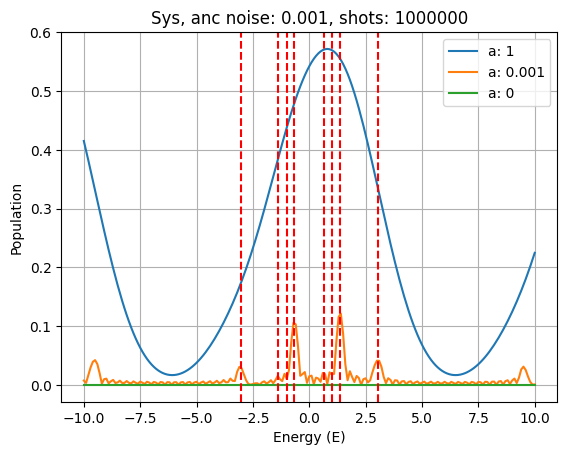

In [28]:
%matplotlib inline
noise = 0.001
shots = 10**6
a = [1, 0.001, 0]
results = []
plt.clf()
for a_val in a:
    
    simulation = Cooling(gamm = a_val,
               delt= 0.5,
               Nran=20,
               Ntro=20,
               noise_anc=noise,
               noise_sys=noise,
               shots=shots
               )
    
    E =  simulation[0]
    P = simulation[1]

    results.append(
        [a, E, P]
    )

    
    plt.plot(E, P, label = f"a: {a_val}")


#plt.axvline(x=ground_state_energy, color='red', linestyle='--', label = "exact min")
for i in eigvals:
    plt.axvline(x=i, color='red', linestyle='--')

plt.xlabel('Energy (E)')
plt.ylabel('Population')
plt.title(f'Sys, anc noise: {noise}, shots: {shots}')
plt.legend()
plt.grid(True)

plt.show()

### 💥Depolarizing error on ancilla

In [29]:
%matplotlib qt5
noises_anc = [0, 0.001,0.01, 0.1]
shots = 10**5
results = []
plt.clf()
for noise in noises_anc:
    
    simulation = Cooling(gamm = 0.001,
               delt= 0.5,
               Nran=20,
               Ntro=20,
               noise_anc=noise,
               noise_sys=0.001,
               shots=shots
               )
    
    E =  simulation[0]
    P = simulation[1]

    results.append(
        [noise, E, P]
    )

    
    plt.plot(E, P, label = f"anc: {noise}")


plt.axvline(x=ground_state_energy, color='red', linestyle='--', label = "exact min")

plt.xlabel('Energy (E)')
plt.ylabel('Population')
plt.title(f'system noise: {0.001}, shots: {shots}')
plt.legend()
plt.grid(True)

plt.show()

### Same noise on ancilla & system 

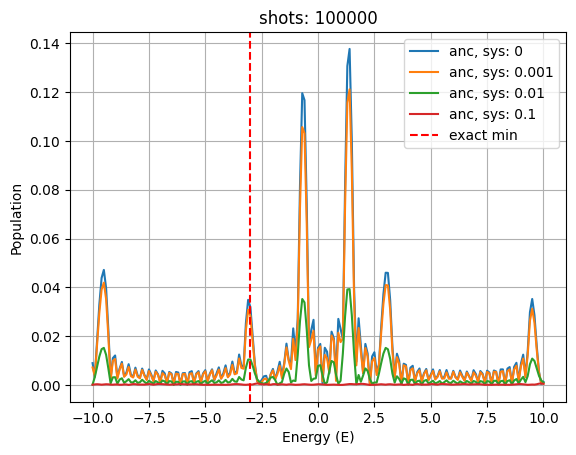

In [20]:
%matplotlib inline
noises_anc = [0, 0.001,0.01, 0.1]
shots = 10**5
results = []
plt.clf()
for noise in noises_anc:
    
    simulation = Cooling(gamm=0.001,
                         delt= 0.5,
                         Nran=20,
                         Ntro=20,
                         noise_anc=noise,
                         noise_sys=noise,
                         shots=shots
    )
    
    E =  simulation[0]
    P = simulation[1]

    results.append(
        [noise, E, P]
    )

    
    plt.plot(E, P, label = f"anc, sys: {noise}")


plt.axvline(x=ground_state_energy, color='red', linestyle='--', label = "exact min")

plt.xlabel('Energy (E)')
plt.ylabel('Population')
plt.title(f'shots: {shots}')
plt.legend()
plt.grid(True)

plt.show()

### Random noises on ancilla & system

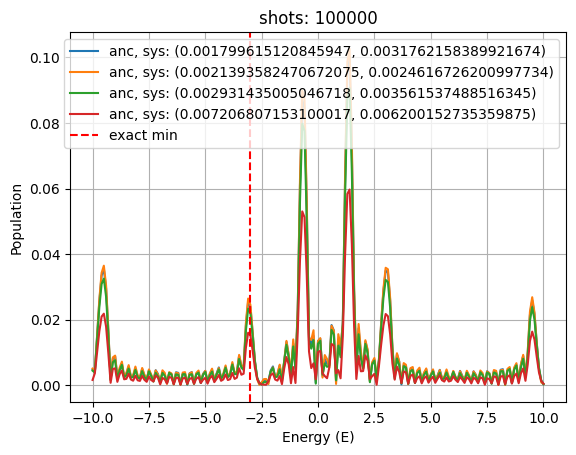

In [21]:
%matplotlib inline
noises_anc = [0.00001, 0.0001, 0.001, 0.01, 0.1]
shots = 10**5
results = []
plt.clf()
for noise in range(4):
    random_anc = random.uniform(0.001, 0.01)
    random_sys = random.uniform(0.001, 0.01)
    simulation = Cooling(gamm=0.001,
               delt= 0.5,
               Nran=20,
               Ntro=20,
               noise_anc= random_anc,
               noise_sys= random_sys,
               shots=shots
               )
    
    E =  simulation[0]
    P = simulation[1]

    results.append(
        [noise, E, P]
    )

    
    plt.plot(E, P, label = f"anc, sys: {random_anc, random_sys}")


plt.axvline(x=ground_state_energy, color='red', linestyle='--', label = "exact min")

plt.xlabel('Energy (E)')
plt.ylabel('Population')
plt.title(f'shots: {shots}')
plt.legend()
plt.grid(True)

plt.show()

### Shot noise

<Figure size 640x480 with 0 Axes>

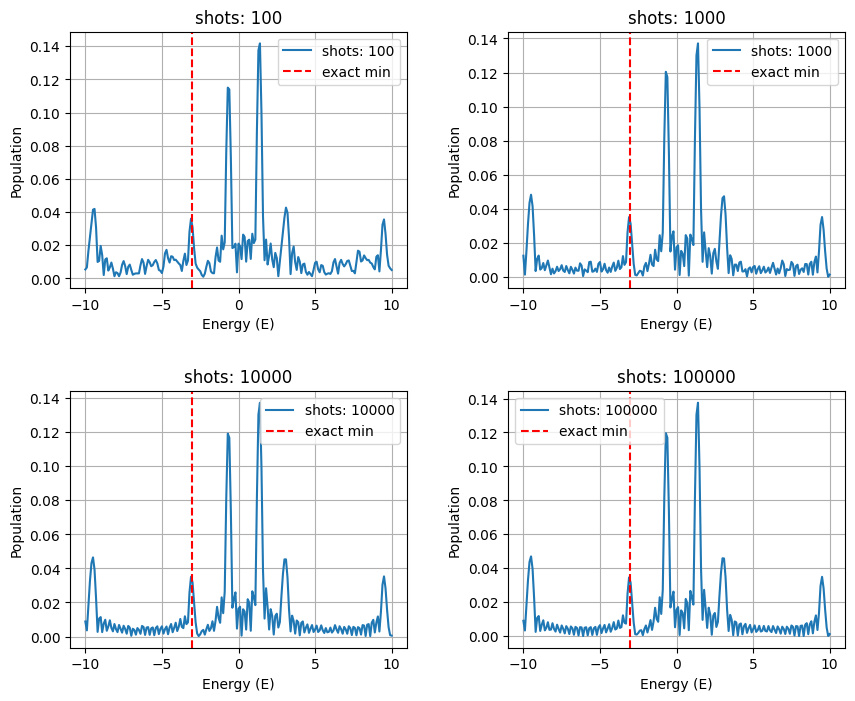

In [22]:
%matplotlib inline
#noises_anc = [0.00001, 0.0001, 0.001, 0.01, 0.1]
shots = [100, 1000, 10000, 100000]
results = []
plt.clf()

# Create a figure with a 2x2 grid layout (2 rows and 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Adjust space between subplots

for i, shot in enumerate(shots):
    random_anc = random.uniform(0.001, 0.01)
    random_sys = random.uniform(0.001, 0.01)
    simulation = Cooling(gamm=0.001,
               delt= 0.5,
               Nran=20,
               Ntro=20,
               noise_anc= 0,
               noise_sys= 0,
               shots=shot
               )
    
    E =  simulation[0]
    P = simulation[1]

    results.append(
        [noise, E, P]
    )

    
    # Access the appropriate subplot using axs[row, col]
    ax = axs[i // 2, i % 2]
    ax.plot(E, P, label=f"shots: {shot}")
    ax.axvline(x=ground_state_energy, color='red', linestyle='--', label="exact min")
    ax.set_xlabel('Energy (E)')
    ax.set_ylabel('Population')
    ax.legend()
    ax.grid(True)
    ax.set_title(f"shots: {shot}")

plt.show()

---

#################################################

--------

In [26]:
import numpy as np

def peak_detect(target_value, E, P):
    # Convert to numpy arrays for easier manipulation
    E = np.array(E)
    P = np.array(P)

    # Step 1: Find the closest value in E to the target_value
    closest_value = min(E, key=lambda x: abs(x - target_value))
    closest_index = np.argmin(np.abs(E - target_value))  # Index of closest value

    # Step 2: Check for a peak at closest_value
    if 0 < closest_index < len(P) - 1:  # Ensure we are not at the boundary
        if P[closest_index] > P[closest_index - 1] and P[closest_index] > P[closest_index + 1]:
            return closest_value
        else:
            return None  # No peak at the closest value
    else:
        return None  # Boundary case, cannot determine a peak

In [ ]:
peak_detect(-3.031248122331948, E1, P1)

In [ ]:
Sim1 = Cooling(delt= 0.5,
               Nran=20,
               Ntro=20,
               noise_anc=0.1,
               noise_sys=0.01,
               shots=1000)

E1 = Sim1[0]
P1 = Sim1[1]

plt.plot(E1, P1)

plt.axvline(x=ground_state_energy, color='red', linestyle='--')

plt.xlabel('Energy (E)')
plt.ylabel('Population (Pop)')
plt.title('Population vs Energy')
plt.grid(True)

# # Initialize the figure and axes
# fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# # Plotting
# axes.plot(E1, P1, "-", color="Gray")
# axes.legend(loc='best')

# # Axis labels
# axes.set_xlabel('Energy')
# axes.set_ylabel('Population')

# Show plot
plt.show()



In [37]:
peak_detect(-3.031248122331948, E1, P1)

--------------

In [ ]:
E = E1
target = -3.031248122331948

# Find the closest value
closest_value = min(E, key=lambda x: abs(x - target))

print("Closest value to the target is:", closest_value)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

E = np.array(E1)
P = np.array(P1)
target = -3.031248122331948

# Step 1: Find the closest value in E
closest_value = min(E, key=lambda x: abs(x - target))
closest_index = np.argmin(np.abs(E - target))  # Index of closest value

# Step 2: Check for a peak at closest_value
if 0 < closest_index < len(P) - 1:  # Ensure we are not at the boundary
    if P[closest_index] > P[closest_index - 1] and P[closest_index] > P[closest_index + 1]:
        print(f"There's a peak at {closest_value} with value {P[closest_index]}")
    else:
        print(f"No peak at {closest_value}")
else:
    print(f"Closest value {closest_value} is at the boundary, cannot determine a peak")

# Plot E vs P for visualization
plt.plot(E, P, label='E vs P')
plt.scatter([closest_value], [P[closest_index]], color='red', label='Closest Value')
plt.title('E vs P Plot')
plt.xlabel('E')
plt.ylabel('P')
plt.legend()
plt.show()


---

In [ ]:
import random

# Add shot noise, with physical noise
delt = 0.5
Nran = 20
Ntro = 20

# Ancilla
perr1 = 0.0005

# System
perr2 = 0.001

Nshots = 10 * 9
quint = init
quint2 = tensor(ket2dm(anc), ket2dm(quint))

EX, EY, Time = [], [], []

for n1 in range(-Nran, Nran + 1):
    t1 = delt * n1
    Time.append(t1)

    # noisyTrotone(tt, NN, rho, pp)
    state = quint2
    for kk in range(Ntro):
        state = noisyTrotone(t1, Ntro, state, perr1, perr2)

    expecx = (tensor(sigmax(), Qeye) * state).tr()
    expecy = (tensor(sigmay(), Qeye) * state).tr()
    varx = 1 - expecx ** 2
    vary = 1 - expecy ** 2

    randx = random.gauss(mu=expecx, sigma=np.sqrt(varx / Nshots))
    randy = random.gauss(mu=expecy, sigma=np.sqrt(vary / Nshots))

    EX.append(randx)
    EY.append(randy)

# Sweep energy
gamm = 0.001
delE = 0.1
Range = 100
Val, Energy = [], []

for k in range(-Range, Range + 1):
    Ee = delE * k
    Energy.append(Ee)

    val = 0
    for n in range(0, 2 * Nran + 1):
        t1 = delt * (n - Nran)
        val += fil(gamm, t1) * np.exp(1j * Ee * t1) * (EX[n] + 1j * EY[n]) * delt

    Val.append(abs(val))

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

# Reference point coordinates
ref_energy = eigvals[0]  # Example x-coordinate for the reference point
ref_val = np.sin(ref_energy)  # Example y-coordinate for the reference point

axes.plot(Energy, Val, "-", color="Gray", label=f'Noise: ancilla={perr1}, system={perr2}, shots= {Nshots}')
axes.legend(loc='best')

# Axis labels
axes.set_xlabel('Energy')
axes.set_ylabel('Population')

# Show plot
plt.show()

----------------

In [ ]:
from qutip import *
import cmath
import math
import matplotlib.pyplot as plt
import numpy as np
import random

# Number of qubits
num_qubits = 3

# Initialize system state as |0> for each qubit
initial_state = [basis(2, 0) for _ in range(num_qubits)]
initial_state = tensor(initial_state)

# Identity tensor product for the system
qeye_system = tensor([qeye(2) for _ in range(num_qubits)])

# Define Pauli-X operator for qubit m
def X_op(m):
    ops = [sigmax() if n == m else qeye(2) for n in range(num_qubits)]
    return tensor(ops)

# Define Pauli-Y operator for qubit m
def Y_op(m):
    ops = [sigmay() if n == m else qeye(2) for n in range(num_qubits)]
    return tensor(ops)

# Define Pauli-Z operator for qubit m
def Z_op(m):
    ops = [sigmaz() if n == m else qeye(2) for n in range(num_qubits)]
    return tensor(ops)

# Similar operators for systems with num_qubits + 1
def X_op2(m):
    ops = [sigmax() if n == m else qeye(2) for n in range(num_qubits + 1)]
    return tensor(ops)

def Y_op2(m):
    ops = [sigmay() if n == m else qeye(2) for n in range(num_qubits + 1)]
    return tensor(ops)

def Z_op2(m):
    ops = [sigmaz() if n == m else qeye(2) for n in range(num_qubits + 1)]
    return tensor(ops)

# Construct the Hamiltonian
def construct_hamiltonian(V, hx, hz):
    ham_terms = [V / 4 * Z_op(n) * Z_op(n + 1) for n in range(num_qubits - 1)]
    ham_terms += [hx * X_op(n) + hz * Z_op(n) for n in range(num_qubits)]
    hamiltonian = sum(ham_terms)
    return hamiltonian

# Depolarizing noise channels
def depolarize(rho, n, p):
    noise_term = (p / 3) * (X_op(n) * rho * X_op(n) + Y_op(n) * rho * Y_op(n) + Z_op(n) * rho * Z_op(n))
    return (1 - p) * rho + noise_term

def depolarize2(rho, n, p):
    noise_term = (p / 3) * (X_op2(n) * rho * X_op2(n) + Y_op2(n) * rho * Y_op2(n) + Z_op2(n) * rho * Z_op2(n))
    return (1 - p) * rho + noise_term

# Trotterized evolution
def trotter_evolution(Ha, tt, N):
    step = (-1j * Ha * tt / N).expm()
    return step ** N

# Controlled Hamiltonian evolution
def controlled_evolution(Ham, tt):
    id_term = tensor(basis(2, 0) * basis(2, 0).dag(), qeye_system)
    exp_term = tensor(basis(2, 1) * basis(2, 1).dag(), (-1j * Ham * tt).expm())
    return id_term + exp_term

def controlled_trotter(Ha, tt, N):
    trotter_step = trotter_evolution(Ha, tt, N)
    id_term = tensor(basis(2, 0) * basis(2, 0).dag(), qeye_system)
    exp_term = tensor(basis(2, 1) * basis(2, 1).dag(), trotter_step)
    return id_term + exp_term

# Noisy Trotter evolution for one step
def noisy_trotter(tt, N, rho, p1, p2):
    state = rho
    for n in range(num_qubits - 1):
        control_step = controlled_evolution(V / 4 * Z_op(n) * Z_op(n + 1), tt / N)
        state = control_step * state * control_step.dag()
        state = depolarize2(state, 0, p1)
        state = depolarize2(state, n, p2)
        state = depolarize2(state, n + 1, p2)
    for n in range(num_qubits):
        control_step = controlled_evolution(hx * X_op(n), tt / N)
        state = control_step * state * control_step.dag()
    return state

# Gaussian filter function
def gaussian_filter(a, x):
    return np.sqrt(a / np.pi) * np.exp(-a * x ** 2)

# Main code parameters
delta_t = 0.5
num_random = 20
num_trotter_steps = 20
error_prob_ancilla = 0
error_prob_system = 0
num_shots = 50

# Initial state setup
ancilla_state = (basis(2, 0) + basis(2, 1)) / np.sqrt(2)
quintuple = initial_state
quintuple2 = tensor(ket2dm(ancilla_state), ket2dm(quintuple))

# Simulation loop with random noise
expectation_X = []
expectation_Y = []
time_points = []

for n1 in range(-num_random, num_random + 1):
    t1 = delta_t * n1
    time_points.append(t1)
    state = quintuple2
    for _ in range(num_trotter_steps):
        state = noisy_trotter(t1, num_trotter_steps, state, error_prob_ancilla, error_prob_system)
    expec_x = (tensor(sigmax(), qeye_system) * state).tr()
    expec_y = (tensor(sigmay(), qeye_system) * state).tr()
    var_x = 1 - expec_x ** 2
    var_y = 1 - expec_y ** 2
    noisy_x = random.gauss(mu=expec_x, sigma=np.sqrt(var_x / num_shots))
    noisy_y = random.gauss(mu=expec_y, sigma=np.sqrt(var_y / num_shots))
    expectation_X.append(noisy_x)
    expectation_Y.append(noisy_y)

# Sweep energy and calculate the population
gamma = 0.001
delta_E = 0.1
energy_range = 100
energy_values = []
populations = []

for k in range(-energy_range, energy_range + 1):
    Ee = delta_E * k
    energy_values.append(Ee)
    val = sum(gaussian_filter(gamma, delta_t * (n - num_random)) * 
              np.exp(1j * Ee * delta_t * (n - num_random)) * 
              (expectation_X[n] + 1j * expectation_Y[n]) * delta_t 
              for n in range(0, 2 * num_random + 1))
    populations.append(abs(val))

# Plot energy vs population
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(energy_values, populations, "-", color="Gray")
ax.set_xlabel('Energy')
ax.set_ylabel('Population')
plt.show()
